# AI vs Human Content detection - Machine Learning & Deep Learning 
## EDA and data visualisation

In this notebook we will explore the data and analyse every column and its contents in detail, deciding on a strategy when doing prepoccesing and model training and testing

In [2]:
import pandas as pd
import numpy as np
import re, string, math
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Data=pd.read_csv("../data/ai_human_content_detection_dataset.csv")
type(Data)

pandas.core.frame.DataFrame

In [5]:
Data.shape

(1367, 17)

In [6]:
Data.head(5)

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [7]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_content          1367 non-null   object 
 1   content_type          1367 non-null   object 
 2   word_count            1367 non-null   int64  
 3   character_count       1367 non-null   int64  
 4   sentence_count        1367 non-null   int64  
 5   lexical_diversity     1367 non-null   float64
 6   avg_sentence_length   1367 non-null   float64
 7   avg_word_length       1367 non-null   float64
 8   punctuation_ratio     1367 non-null   float64
 9   flesch_reading_ease   1288 non-null   float64
 10  gunning_fog_index     1332 non-null   float64
 11  grammar_errors        1367 non-null   int64  
 12  passive_voice_ratio   1336 non-null   float64
 13  predictability_score  1367 non-null   float64
 14  burstiness            1367 non-null   float64
 15  sentiment_score      

In [8]:
Data.isna().sum().sort_values(ascending=False)


flesch_reading_ease     79
sentiment_score         54
gunning_fog_index       35
passive_voice_ratio     31
text_content             0
content_type             0
word_count               0
character_count          0
sentence_count           0
punctuation_ratio        0
avg_word_length          0
avg_sentence_length      0
lexical_diversity        0
grammar_errors           0
predictability_score     0
burstiness               0
label                    0
dtype: int64

In [ ]:
Data = Data.dropna()


In [10]:
Data.shape

(1179, 17)

In [11]:
missing_values = Data.apply(lambda x: x.isnull().sum().sum())
print(missing_values)


text_content            0
content_type            0
word_count              0
character_count         0
sentence_count          0
lexical_diversity       0
avg_sentence_length     0
avg_word_length         0
punctuation_ratio       0
flesch_reading_ease     0
gunning_fog_index       0
grammar_errors          0
passive_voice_ratio     0
predictability_score    0
burstiness              0
sentiment_score         0
label                   0
dtype: int64


In [12]:
Data.describe() 

,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
count,1179.00000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,140.09754,939.950806,25.575064,0.967592,5.492392,5.721349,0.027406,52.093079,7.557286,1.567430,0.149918,63.141077,0.427259,-0.002566,0.500424
std,98.36175,660.868244,18.057071,0.026207,0.452961,0.286955,0.002866,10.564724,1.865698,1.932518,0.056925,28.323529,0.199299,0.591635,0.500212
min,3.00000,14.000000,1.000000,0.875000,3.000000,4.000000,0.019400,-50.010000,1.200000,0.000000,0.050000,20.030000,0.101900,-0.999300,0.000000
25%,59.00000,400.500000,11.000000,0.951750,5.290000,5.590000,0.026100,47.660000,6.620000,0.000000,0.099150,39.290000,0.250600,-0.523950,0.000000
50%,130.00000,882.000000,24.000000,0.969100,5.490000,5.710000,0.027200,52.170000,7.510000,1.000000,0.150400,57.260000,0.413300,-0.006300,1.000000
75%,192.00000,1287.500000,35.000000,0.989000,5.700000,5.830000,0.028400,57.275000,8.395000,3.000000,0.200200,87.360000,0.592000,0.520600,1.000000
max,443.00000,2966.000000,83.000000,1.000000,8.000000,8.330000,0.071400,98.870000,27.870000,10.000000,0.250000,119.930000,0.798400,0.995900,1.000000


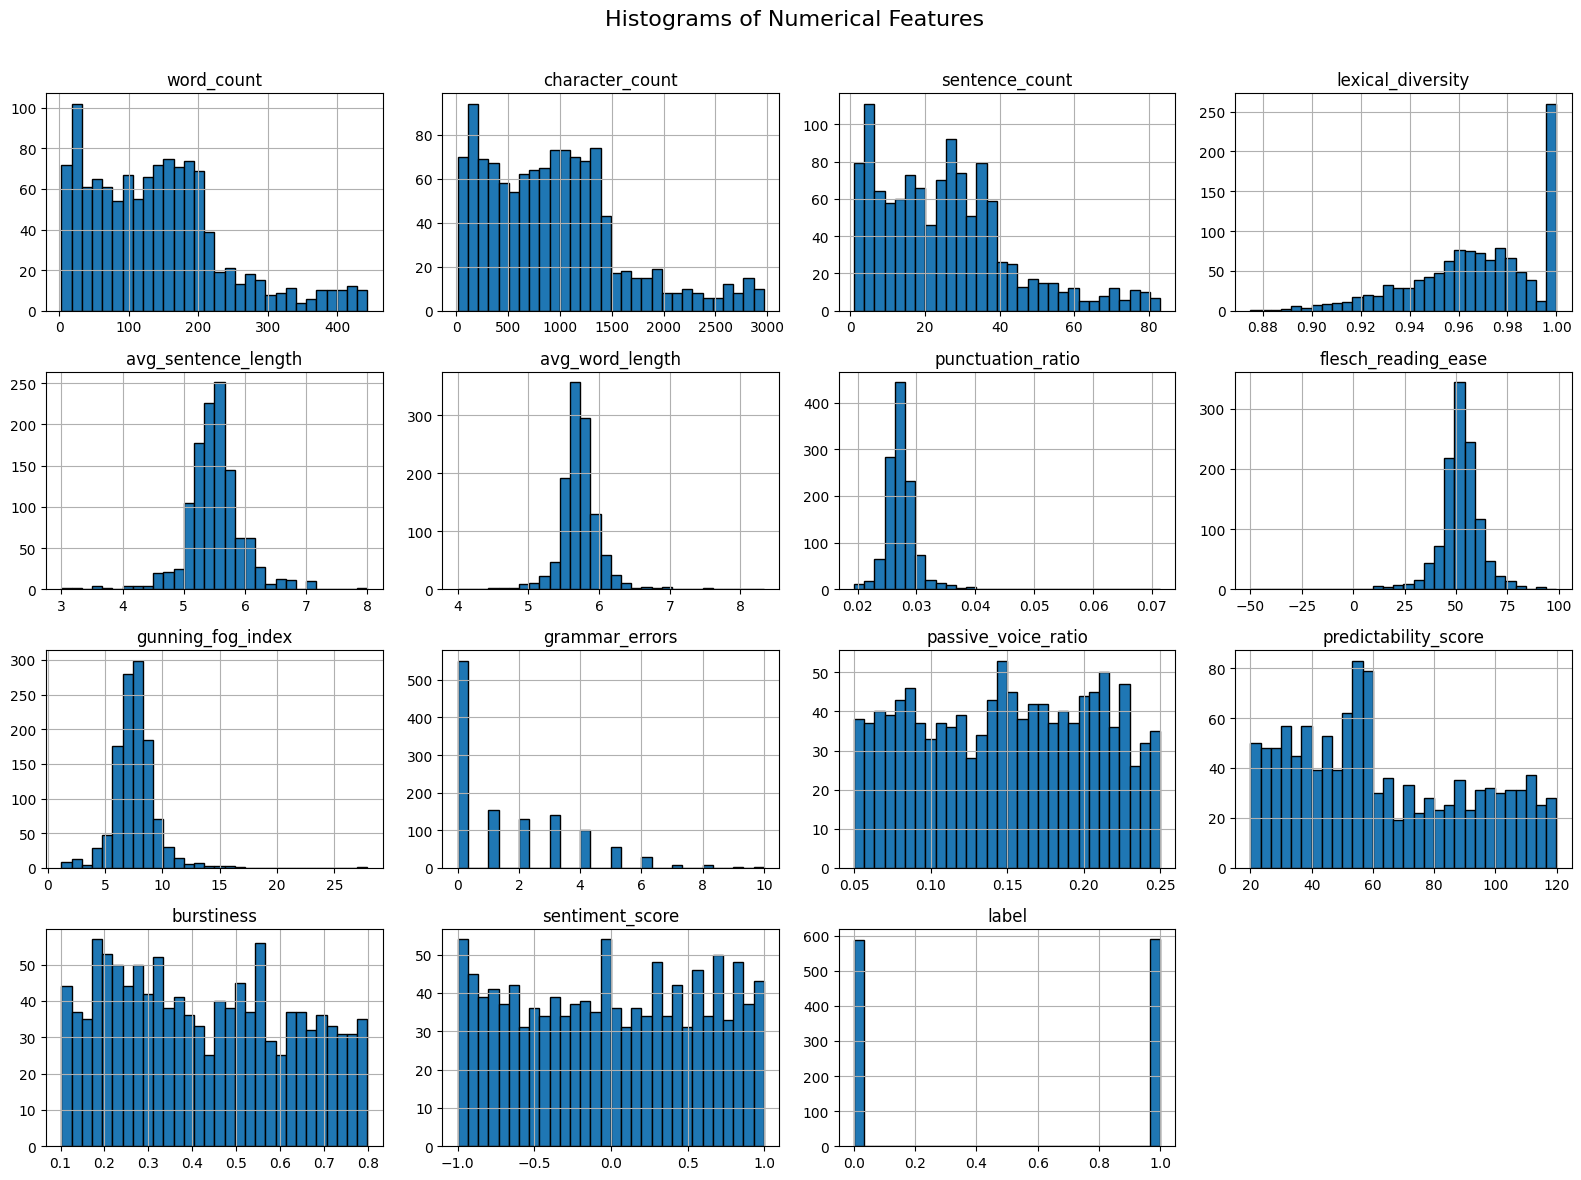

In [13]:
# Histograms for all numerical features
Data.select_dtypes(include='number').hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

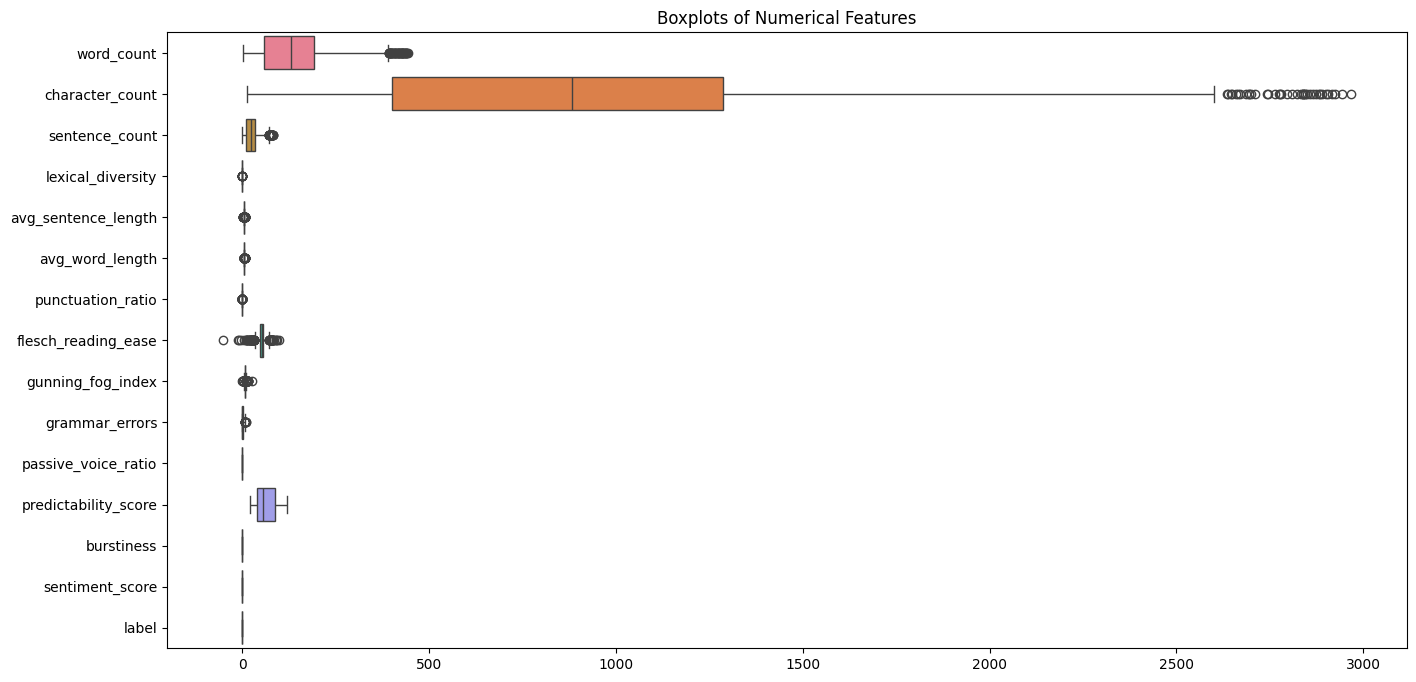

In [14]:
# Boxplots for all numerical features
plt.figure(figsize=(16, 8))
sns.boxplot(data=Data.select_dtypes(include='number'), orient='h')
plt.title('Boxplots of Numerical Features')
plt.show()

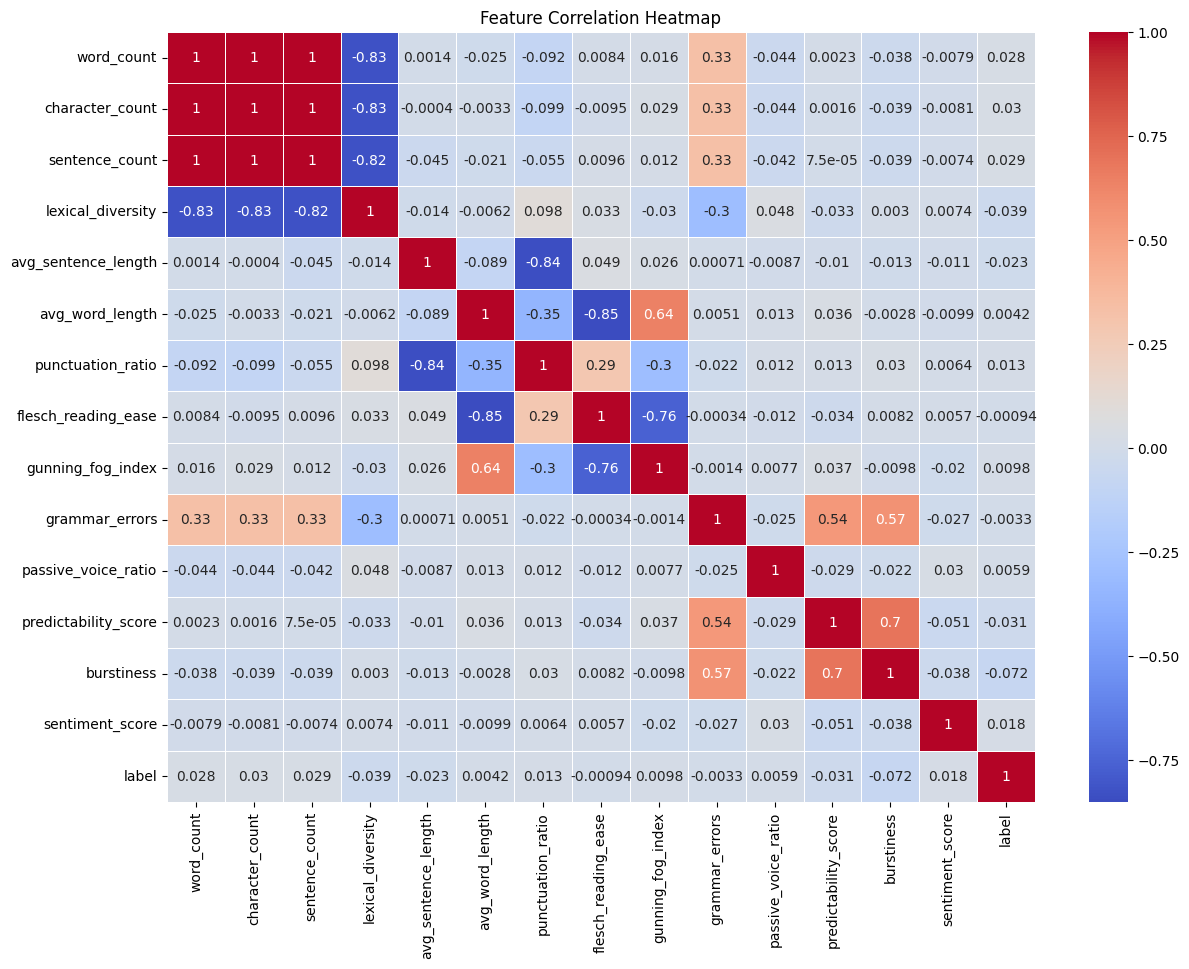

In [15]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = Data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

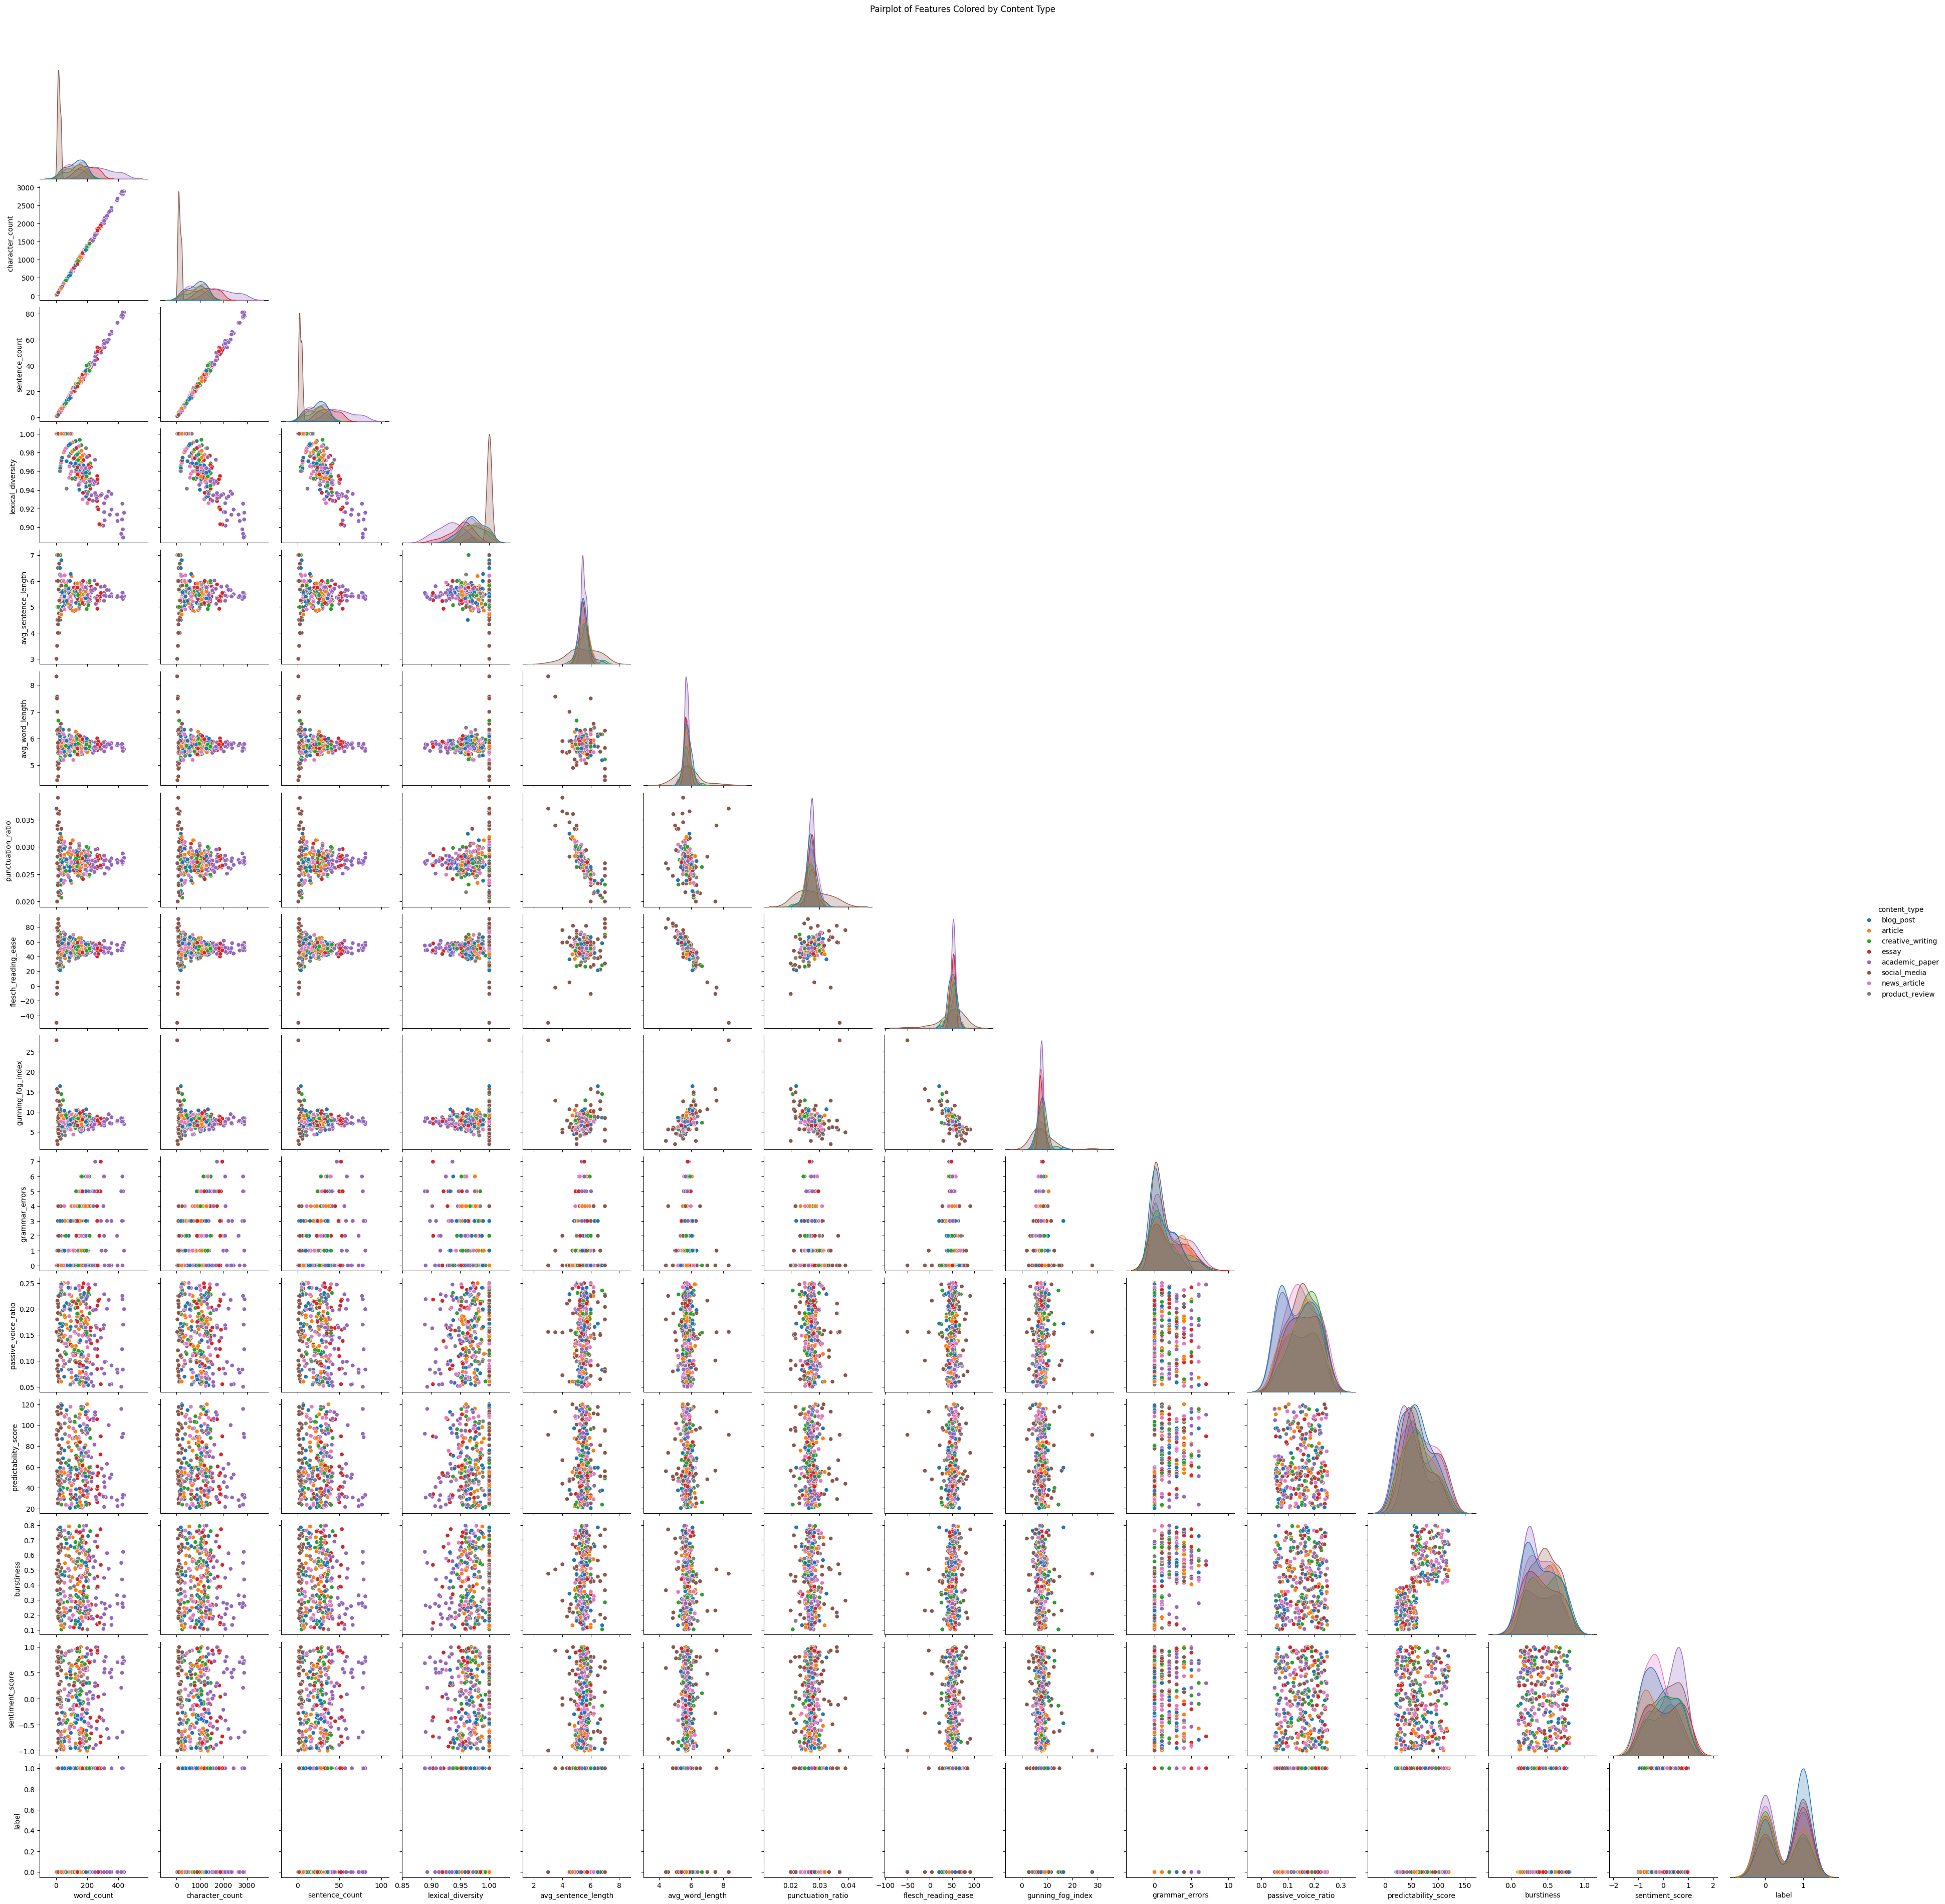

In [16]:
# Pairplot for feature relationships (sampled for speed if dataset is large)
sampled = Data.sample(n=min(300, len(Data)), random_state=42)
sns.pairplot(sampled, hue='content_type', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Features Colored by Content Type', y=1.02)
plt.show()

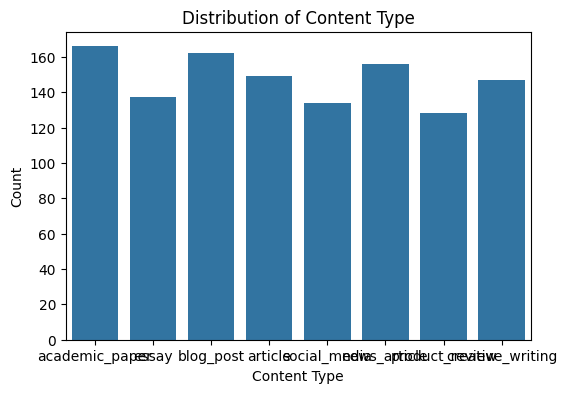

In [17]:
# Bar plot for content_type distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='content_type', data=Data)
plt.title('Distribution of Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

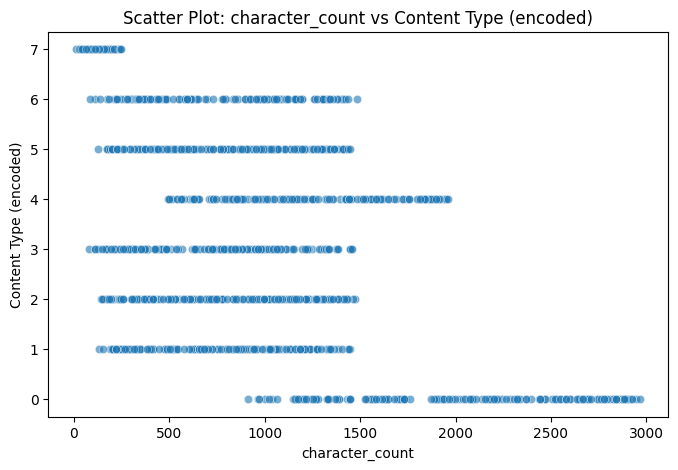

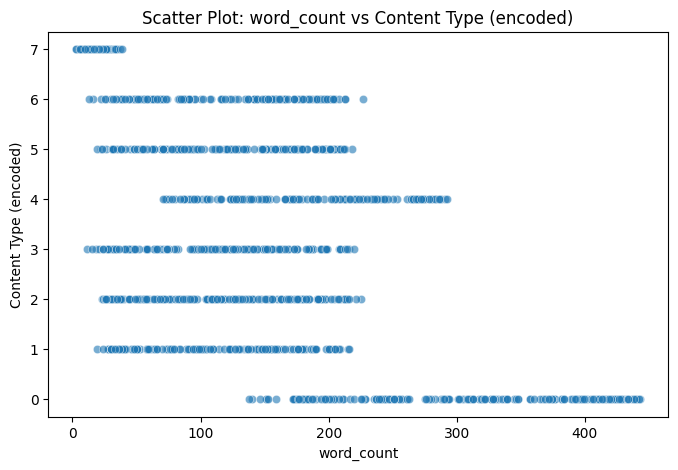

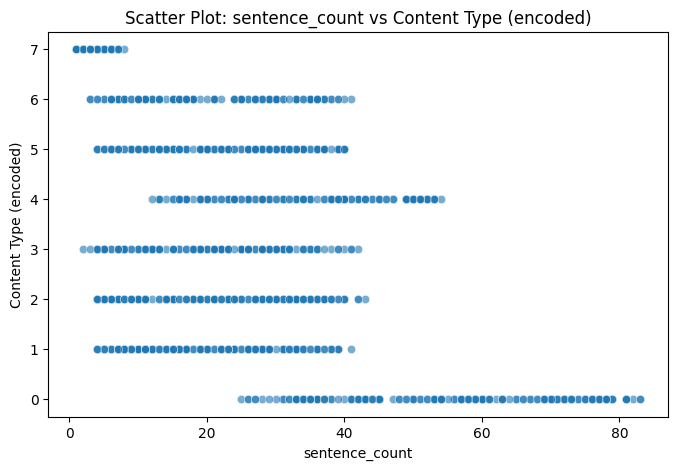

In [19]:
# Encode content_type for correlation analysis
Data['content_type_encoded'] = Data['content_type'].astype('category').cat.codes

# Recalculate correlation matrix including the encoded target
corr_matrix = Data.corr(numeric_only=True)

# Get top 3 features most correlated with content_type_encoded (excluding itself)
important_features = corr_matrix['content_type_encoded'].abs().sort_values(ascending=False).index[1:4]

# Scatter plots for selected features vs target
for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='content_type_encoded', data=Data, alpha=0.6)
    plt.title(f'Scatter Plot: {feature} vs Content Type (encoded)')
    plt.xlabel(feature)
    plt.ylabel('Content Type (encoded)')
    plt.show()